In [1]:
import keras
import pandas as pd
import os
from tensorflow.keras.layers import BatchNormalization
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras.layers import BatchNormalization

from keras.models import Model, Sequential
from keras import layers

In [2]:
train_df = pd.read_csv('\dataset\Training_set.csv')

In [3]:
def load_images_with_binary_labels(df, folder_path):
    images = []
    labels = []
    for index, row in df.iterrows():
        image_path = os.path.join(folder_path, row['filename'])
        image = Image.open(image_path)
        image = image.resize((64, 64))
        image = np.array(image) / 255.0
        images.append(image)
        label = 1 if 'butterfly' in row['label'] else 0
        labels.append(label)
    return images, labels


In [4]:
train_images, train_labels = load_images_with_binary_labels(train_df, '\dataset\train')
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [5]:
X_train, X_val, y_train, y_val= train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [6]:
label_encoder = LabelEncoder()
train_df['binary_label'] = label_encoder.fit_transform(train_df['label'] != 'no butterfly')

In [7]:
print("Train images shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Validation images shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)

Train images shape: (9770, 64, 64, 3)
Train labels shape: (9770,)
Validation images shape: (2443, 64, 64, 3)
Validation labels shape: (2443,)


In [8]:

train_df = pd.read_csv('\dataset\Training_set.csv')

class_labels = train_df['label'].unique().tolist()

print("Number of classes:", len(class_labels))
print("Class labels:", class_labels)

print("All labels:", train_labels)

Number of classes: 2
Class labels: ['butterfly', 'not ']
All labels: [1 1 1 ... 0 0 0]


<Figure size 640x480 with 0 Axes>

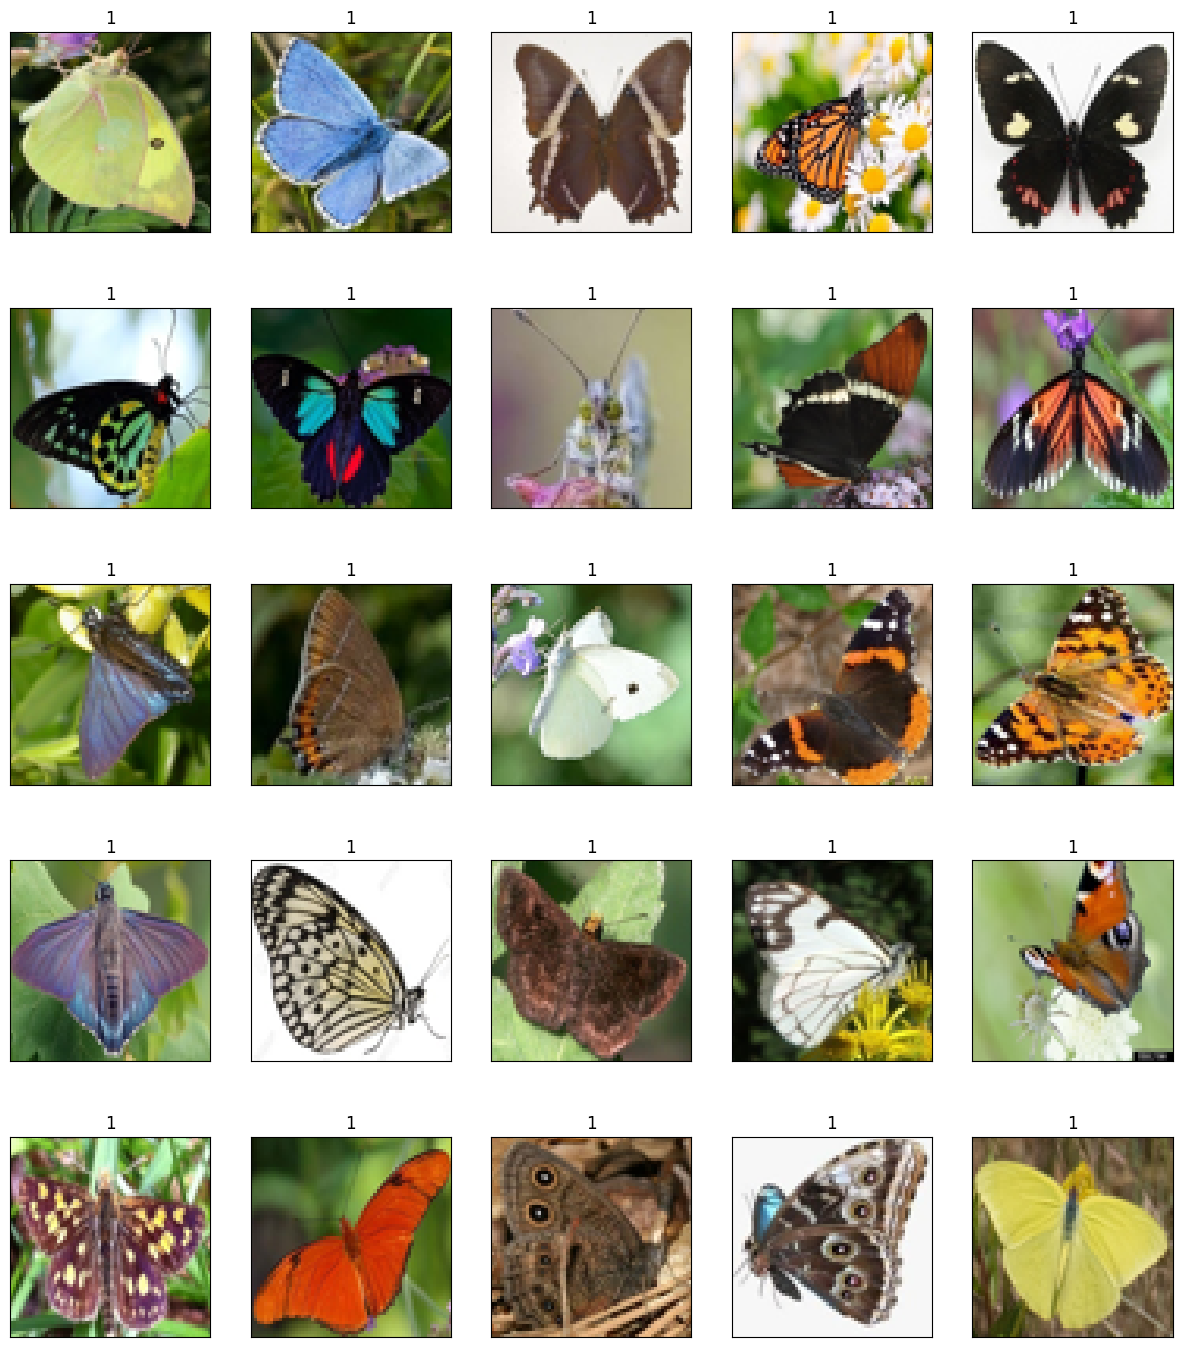

In [9]:
plt.tight_layout()
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,15))
plt.subplots_adjust(top=1.0)

for idx, ax in enumerate(axes.flat):
    image = train_images[idx]
    label_name = train_labels[idx]
    
    ax.imshow(image)
    ax.set(title=label_name)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

<Figure size 640x480 with 0 Axes>

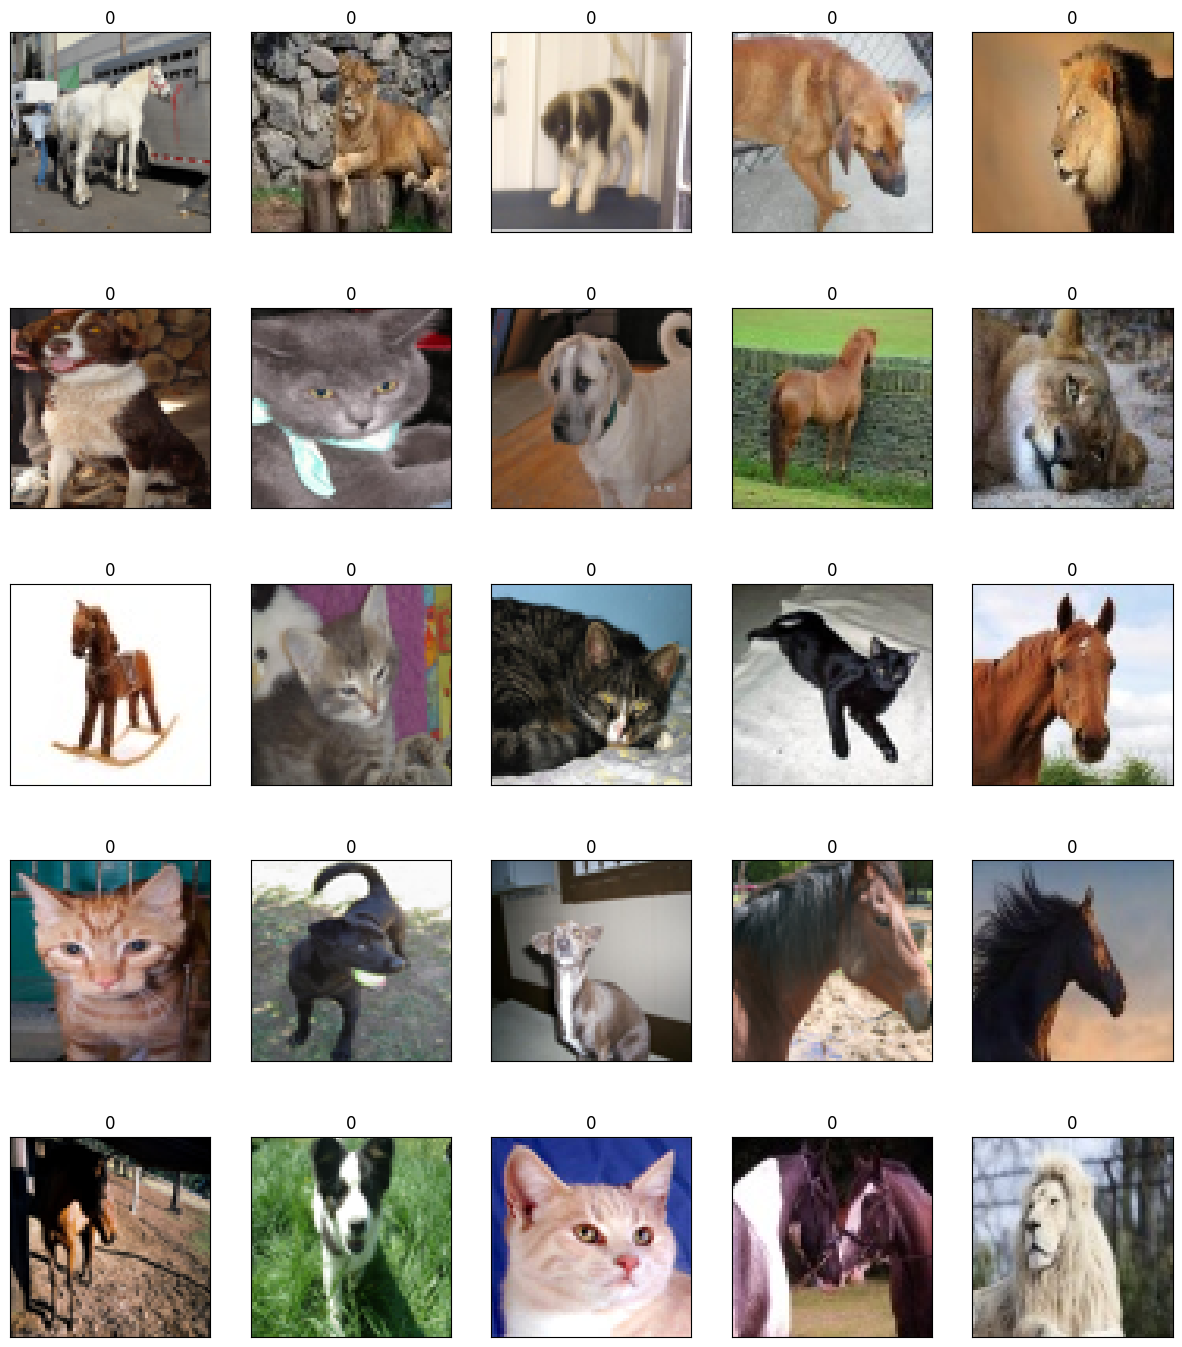

In [10]:
import numpy as np

plt.tight_layout()
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
plt.subplots_adjust(top=1.0)

# Select images and labels belonging to class 0
class_0_images = train_images[train_labels == 0]
class_0_labels = train_labels[train_labels == 0]

# Randomly select 25 images from class 0
random_indices = np.random.choice(len(class_0_images), size=25, replace=False)
random_images = class_0_images[random_indices]
random_labels = class_0_labels[random_indices]

# Iterate over the randomly selected images and labels
for idx, ax in enumerate(axes.flat):
    image = random_images[idx]
    label_name = random_labels[idx]

    ax.imshow(image)
    ax.set(title=label_name)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


In [11]:
cnn = tf.keras.models.Sequential()

In [12]:
cnn.add(tf.keras.layers.Input(shape=[64,64,3]))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [16]:
cnn.add(tf.keras.layers.Flatten())

In [17]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
cnn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=10)


Epoch 1/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7250 - loss: 0.5100 - val_accuracy: 0.8530 - val_loss: 0.3476
Epoch 2/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8826 - loss: 0.2897 - val_accuracy: 0.9235 - val_loss: 0.2265
Epoch 3/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9162 - loss: 0.2143 - val_accuracy: 0.9271 - val_loss: 0.1956
Epoch 4/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9337 - loss: 0.1695 - val_accuracy: 0.9251 - val_loss: 0.2002
Epoch 5/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9386 - loss: 0.1551 - val_accuracy: 0.9456 - val_loss: 0.1670
Epoch 6/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9438 - loss: 0.1375 - val_accuracy: 0.9370 - val_loss: 0.1709
Epoch 7/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9597 - loss: 0.1052 - val_accuracy: 0.9439 - val_loss: 0.1787
Epoch 8/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9640 - loss: 0.0947 - val_ac

In [20]:
cnn.save('\dataset\cnn_binary_classification.keras')

In [22]:
from PIL import Image
import numpy as np

# Load an image to test
test_image_path = '\image_path'
test_image = Image.open(test_image_path)

# Convert to RGB if needed
test_image = test_image.convert("RGB")  # Fix RGBA to RGB issue

# Resize and preprocess the image
test_image = test_image.resize((64, 64))
test_image = np.array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Predict whether the image contains a butterfly
prediction = cnn.predict(test_image)

# Convert the prediction to a human-readable label
if prediction > 0.5:
    confidence = prediction[0][0] * 100  # Convert probability to percentage
    print(f"The image contains a butterfly with {confidence:.2f}% confidence.")
else:
    confidence = (1 - prediction[0][0]) * 100  # Convert probability to percentage
    print(f"The image does not contain a butterfly with {confidence:.2f}% confidence.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
The image does not contain a butterfly with 78.42% confidence.
